In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd ..

In [4]:
%cd drive/MyDrive/

/content/drive/MyDrive


1. Clone repos and install requirements

In [5]:

# !git clone https://github.com/ttingchen/stable-diffusion.git
# !git clone https://github.com/CompVis/taming-transformers
# !pip install grad-cam
# !pip install -e ./taming-transformers
# !pip install torchattacks
# !pip install ipywidgets omegaconf>=2.0.0 pytorch-lightning>=1.0.8 torch-fidelity einops
import sys
sys.path.append(".")
sys.path.append('./taming-transformers')
from taming.models import vqgan # checking correct import from taming

2. Define the Task (currently only superresolution is available, other tasks are coming soon)



In [6]:
%cd stable-diffusion
# !git stash
# !git pull https://github.com/ttingchen/stable-diffusion.git main
import ipywidgets as widgets
from IPython.display import display

mode = widgets.Select(options=['superresolution'],
    value='superresolution', description='Task:')
display(mode)

/content/drive/MyDrive/stable-diffusion


Select(description='Task:', options=('superresolution',), value='superresolution')

3. Download model checkpoint ( takes ~ 3 Min) and load model


In [7]:

from notebook_helpers import get_model
model = get_model(mode.value)

Using downloaded and verified file: logs/diffusion/superresolution_bsr/configs/project.yaml/?dl=1
Using downloaded and verified file: logs/diffusion/superresolution_bsr/checkpoints/last.ckpt/?dl=1
Loading model from logs/diffusion/superresolution_bsr/checkpoints/last.ckpt/?dl=1
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


4. Optional step: Upload your own conditioning image for superresolution (height and width have to take values in [128, 192, 256])

In [8]:
import importlib
from notebook_helpers import get_custom_cond

get_custom_cond(mode.value)

Saving test.png to test.png


4. Select conditioning from available examples or the uploaded custom conditioning

In [9]:
from notebook_helpers import get_cond_options, get_cond
dir, options = get_cond_options(mode.value)
cond_choice = widgets.RadioButtons(
        options=options,
        description='Select conditioning:',
        disabled=False
    )
display(cond_choice)

RadioButtons(description='Select conditioning:', options=('custom_generated_image_3 (1).png', 'custom_images_g…

5. Run Model

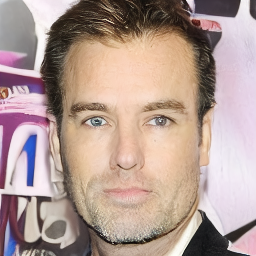

Plotting: Switched to EMA weights
Sampling with eta = 1.0; steps: 100
Data shape for DDIM sampling is (1, 3, 256, 256), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler:   0%|          | 0/100 [00:00<?, ?it/s]

Testing
mask tensor([[[[0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          [0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          [0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.4106, 0.4106, 0.4106,  ..., 0.3543, 0.3543, 0.3543],
          [0.4106, 0.4106, 0.4106,  ..., 0.3543, 0.3543, 0.3543],
          [0.4106, 0.4106, 0.4106,  ..., 0.3543, 0.3543, 0.3543]],

         [[0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          [0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          [0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.4106, 0.4106, 0.4106,  ..., 0.3543, 0.3543, 0.3543],
          [0.4106, 0.4106, 0.4106,  ..., 0.3543, 0.3543, 0.3543],
          [0.4106, 0.4106, 0.4106,  ..., 0.3543, 0.3543, 0.3543]],

         [[0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          [0.0605, 0.0605, 0.0605,  ..., 0.0000, 0.0000, 0.0000],
          [0.0605, 0.0605, 0.

DDIM Sampler: 100%|██████████| 100/100 [01:14<00:00,  1.34it/s]


Plotting: Restored training weights


In [16]:
from notebook_helpers import run
importlib.reload(sys.modules['notebook_helpers'])
import os
custom_steps = 100
cond_choice_path = os.path.join(dir, cond_choice.value)
logs = run(model["model"], cond_choice_path, mode.value, custom_steps)

6. Display Sample

(1, 1024, 1024, 3)


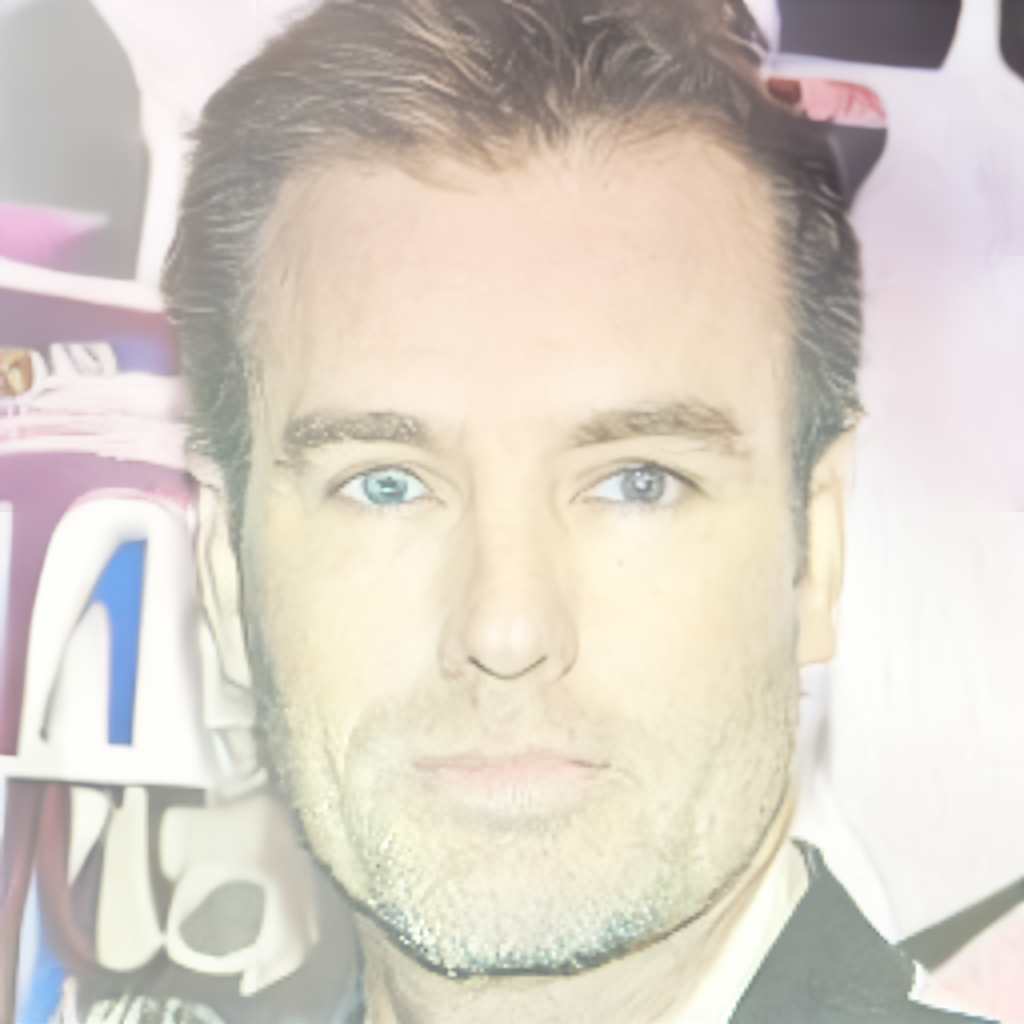

In [17]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
display(a)
